In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib
import descartes

In [146]:
import shapely
import shapely.wkt

In [116]:
#path to the raw school district file and the raw precinct file
#I unzipped both zip files
districts_shp_path = 'districts/districts/School_Districts_1920.shp'
districts_frame = gpd.read_file(districts_shp_path)
districts_frame['geometry'] = districts_frame['geometry'].buffer(0)
general_shp_path = 'general/general/2016General.shp'
general_frame = gpd.read_file(general_shp_path)

In [121]:
general_frame['geometry'] = general_frame['geometry'].buffer(0)

In [122]:
#reading in file that has precinct
other_frame = gpd.read_file('PrecinctToDistrict.csv')

In [123]:
other_frame

,field_1,CNTY,PREC,PCTKEY,cntykey,SDLEA10,NAME,NAME2,DISTRICT_N,NCES_DISTR,geometry
0,5297,145,0105,1450105,73,13920,Chilton ISD,Chilton,73901,4813920,None
1,5301,145,0301,1450301,73,13920,Chilton ISD,Chilton,73901,4813920,None
2,5302,145,0302,1450302,73,13920,Chilton ISD,Chilton,73901,4813920,None
3,5304,145,0404,1450404,73,13920,Chilton ISD,Chilton,73901,4813920,None
4,7004,145,0405,1450405,73,13920,Chilton ISD,Chilton,73901,4813920,None
...,...,...,...,...,...,...,...,...,...,...,...
18660,5576.1,61,0098,610098,31,28290,Los Fresnos Cons ISD,Los Fresnos Cons,31906,4828290,None
18661,5577.1,61,0100,610100,31,28290,Los Fresnos Cons ISD,Los Fresnos Cons,31906,4828290,None
18662,5578.1,61,0095,610095,31,28290,Los Fresnos Cons ISD,Los Fresnos Cons,31906,4828290,None
18663,5582.1,61,0102,610102,31,28290,Los Fresnos Cons ISD,Los Fresnos Cons,31906,4828290,None


In [124]:
districts_frame.head()

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR,Shape_area,Shape_len,geometry
0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.215480,"POLYGON ((1285305.404 1030433.676, 1285315.647..."
1,11250,Bremond ISD,Bremond,198901,198-901,198901,4811250,6,4.750537e+08,143568.863312,"POLYGON ((1319544.298 1017372.883, 1319651.605..."
2,30180,Memphis ISD,Memphis,96904,096-904,096904,4830180,4,1.729847e+09,245240.220726,"POLYGON ((956989.914 1396713.039, 956989.699 1..."
3,34380,Patton Springs ISD,Patton Springs,63906,063-906,063906,4834380,5,1.007704e+09,147094.679366,"POLYGON ((952017.469 1280637.340, 952013.837 1..."
4,00002,Spur ISD,Spur,63903,063-903,063903,4800002,3,1.369828e+09,214386.521595,"POLYGON ((939157.255 1247265.923, 938834.615 1..."


In [125]:
general_frame.head()

,CNTY,COLOR,PREC,PCTKEY,cntykey,Shape_area,Shape_len,geometry
0,439,6,1611,4391611,220,3.574480e+04,958.348333,"POLYGON ((1249580.405 1174145.301, 1249495.984..."
1,27,2,0311,270311,14,1.784585e+08,66348.774599,"POLYGON ((1248151.416 1010828.003, 1248115.887..."
2,35,5,0001,350001,18,3.533913e+08,99413.023239,"POLYGON ((1203351.469 1102126.682, 1203420.185..."
3,201,5,0736,2010736,101,4.363907e+04,1101.080417,"POLYGON ((1448608.994 856538.940, 1448597.676 ..."
4,439,3,3039,4393039,220,1.368617e+07,20316.418747,"POLYGON ((1268323.146 1205017.455, 1268329.146..."


<AxesSubplot:>

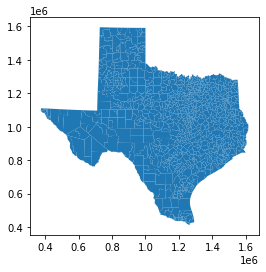

In [126]:
districts_frame.plot()

<AxesSubplot:>

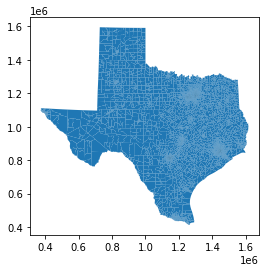

In [127]:
general_frame.plot()

In [128]:
join_res_prec_geom= gpd.sjoin(general_frame, districts_frame, op='intersects')
join_res_prec_geom.head()

,CNTY,COLOR_left,PREC,PCTKEY,cntykey,Shape_area_left,Shape_len_left,geometry,index_right,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR_right,Shape_area_right,Shape_len_right
0,439,6,1611,4391611,220,3.574480e+04,958.348333,"POLYGON ((1249580.405 1174145.301, 1249495.984...",948,19700,Fort Worth ISD,Fort Worth,220905,220-905,220905,4819700,1,5.419803e+08,252583.662293
984,439,5,1366,4391366,220,6.735285e+05,6170.153836,"POLYGON ((1242260.517 1171308.183, 1242380.432...",948,19700,Fort Worth ISD,Fort Worth,220905,220-905,220905,4819700,1,5.419803e+08,252583.662293
992,439,7,1578,4391578,220,7.274191e+06,12854.551654,"POLYGON ((1252761.638 1165129.055, 1252763.805...",948,19700,Fort Worth ISD,Fort Worth,220905,220-905,220905,4819700,1,5.419803e+08,252583.662293
995,439,3,1427,4391427,220,3.028494e+05,2363.721842,"POLYGON ((1258381.527 1167979.188, 1258295.200...",948,19700,Fort Worth ISD,Fort Worth,220905,220-905,220905,4819700,1,5.419803e+08,252583.662293
996,439,7,1576,4391576,220,2.011568e+05,3354.420262,"POLYGON ((1251766.651 1169942.760, 1251764.129...",948,19700,Fort Worth ISD,Fort Worth,220905,220-905,220905,4819700,1,5.419803e+08,252583.662293


In [129]:
Chilton_p = join_res_prec_geom.loc[join_res_prec_geom['NAME'] == 'Chilton ISD']
Chilton_p

,CNTY,COLOR_left,PREC,PCTKEY,cntykey,Shape_area_left,Shape_len_left,geometry,index_right,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR_right,Shape_area_right,Shape_len_right
5297,145,7,0105,1450105,73,5.981917e+07,45018.884088,"POLYGON ((1293893.378 1027291.269, 1294165.079...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548
5301,145,5,0301,1450301,73,2.289287e+08,78101.615742,"POLYGON ((1289188.661 1015581.270, 1289196.656...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548
5302,145,2,0302,1450302,73,4.669280e+07,41643.522251,"POLYGON ((1293410.534 1020616.431, 1293670.722...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548
5304,145,7,0404,1450404,73,1.147702e+08,72896.220229,"POLYGON ((1287092.886 1016415.220, 1286601.413...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548
7004,145,5,0405,1450405,73,1.235415e+08,76096.607222,"POLYGON ((1283694.540 1030420.000, 1283734.338...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548
7005,145,1,0104,1450104,73,3.467509e+08,100938.526948,"POLYGON ((1311275.770 1030699.354, 1311436.645...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548
7006,145,4,0403,1450403,73,2.246006e+08,85161.436490,"POLYGON ((1282735.971 1021649.069, 1282750.806...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548
8302,309,4,0074,3090074,155,8.224264e+07,56757.683422,"POLYGON ((1281438.219 1035778.651, 1282322.114...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548


<AxesSubplot:>

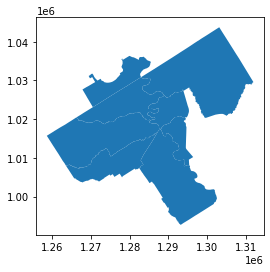

In [130]:
Chilton_p.plot()

In [131]:
join_res_school_geom = gpd.sjoin(districts_frame, general_frame, op='intersects')

In [132]:
Chilton_s = join_res_school_geom.loc[join_res_school_geom['NAME'] == 'Chilton ISD']
Chilton_s = Chilton_s.drop_duplicates('NAME')

In [133]:
Chilton_s

,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR_left,Shape_area_left,Shape_len_left,geometry,index_right,CNTY,COLOR_right,PREC,PCTKEY,cntykey,Shape_area_right,Shape_len_right
0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548,"POLYGON ((1285305.404 1030433.676, 1285315.647...",5301,145,5,0301,1450301,73,2.289287e+08,78101.615742


<AxesSubplot:>

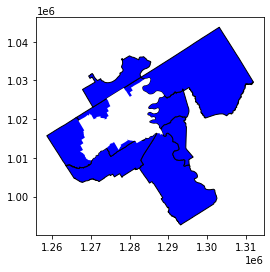

In [134]:
base = Chilton_p.plot(color='blue', edgecolor='black')
Chilton_s.plot(ax=base, color='white')

In [135]:
Chilton_p_sample['percentInSchool'] = Chilton_p_sample.apply(lambda x: districts_frame.iloc[x['index_right']]['geometry'].intersection(x['geometry']).area / districts_frame.iloc[x['index_right']]['geometry'].area *100 , axis=1)

C:\Users\mattb\Anaconda3\envs\foursevenfive\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

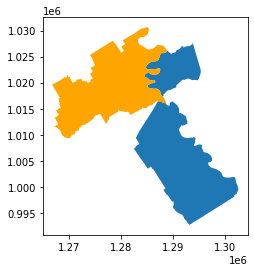

In [136]:
Chilton_p_sample = Chilton_p.iloc[0:2]
base = Chilton_p.iloc[0:2].plot()
Chilton_s.plot(ax=base, color='orange')

<AxesSubplot:>

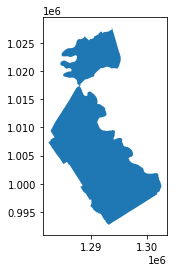

In [137]:
Chilton_p.iloc[0:2].plot()

<AxesSubplot:>

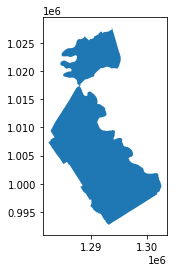

In [138]:
Chilton_p.iloc[0:2].plot()

In [139]:
#Filtering on sample.
Chilton_p_sample['percentInSchool'] = Chilton_p_sample.apply(lambda x: districts_frame.iloc[x['index_right']]['geometry'].intersection(x['geometry']).area / districts_frame.iloc[x['index_right']]['geometry'].area *100 , axis=1)

C:\Users\mattb\Anaconda3\envs\foursevenfive\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [140]:
#showing the sample with it's filled in percentage value
Chilton_p_sample

,CNTY,COLOR_left,PREC,PCTKEY,cntykey,Shape_area_left,Shape_len_left,geometry,index_right,SDLEA10,NAME,NAME2,DISTRICT_N,DISTRICT,DISTRICT_C,NCES_DISTR,COLOR_right,Shape_area_right,Shape_len_right,percentInSchool
5297,145,7,0105,1450105,73,5.981917e+07,45018.884088,"POLYGON ((1293893.378 1027291.269, 1294165.079...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548,0.000000
5301,145,5,0301,1450301,73,2.289287e+08,78101.615742,"POLYGON ((1289188.661 1015581.270, 1289196.656...",0,13920,Chilton ISD,Chilton,73901,073-901,073901,4813920,6,2.294086e+08,111898.21548,0.484624


In [141]:
#just trying to see, quick google said this might fix polygon errors.
join_res_prec_geom['geometry'] = join_res_prec_geom['geometry'].buffer(0)

In [142]:
#Should work but can't figure out why this one point is failing.
join_res_prec_geom['percentInSchool'] = join_res_prec_geom.apply(lambda x: districts_frame.iloc[x['index_right']]['geometry'].intersection(x['geometry']).area / districts_frame.iloc[x['index_right']]['geometry'].area *100 , axis=1)

In [153]:
join_res_prec_geom['geometry'] = join_res_prec_geom.geometry.apply(lambda x: shapely.wkt.dumps(x))

C:\Users\mattb\Anaconda3\envs\foursevenfive\lib\site-packages\geopandas\geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [163]:
take2 = join_res_prec_geom.drop(columns = ['geometry'])
take2.to_csv('PrecinctToDistrictPercentSchool.csv')